# Simple regression with TensorFlow

Basic TF experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
dat = pd.read_csv("./rbfs/phi_short_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,y,site,date
0,0,1.000000,0.933712,0.760067,0.539408,0.333740,0.180022,0.084658,0.034709,0.012406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
1,1,0.999728,0.941552,0.773095,0.553410,0.345372,0.187912,0.089135,0.036861,0.013290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032,2005,2023-01-08
2,2,0.998914,0.948942,0.785919,0.567468,0.357216,0.196041,0.093797,0.039125,0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030,2005,2023-01-08
3,3,0.997558,0.955871,0.798521,0.581567,0.369266,0.204411,0.098650,0.041506,0.015225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08
4,4,0.995663,0.962327,0.810885,0.595692,0.381514,0.213022,0.103697,0.044008,0.016283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031,2005,2023-01-08


In [5]:
X = dat.iloc[:, 1:218].to_numpy()
y = dat['y'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [7]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [8]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [9]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               111616    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 604417 (2.31 MB)
Trainable params: 6044

In [10]:
# Compile the model
initial_learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [11]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 0s 371ms/step - loss: 0.0890 - mae: 0.0890 - mse: 0.0086 - val_loss: 0.2363 - val_mae: 0.2363 - val_mse: 0.0563
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2371 - mae: 0.2371 - mse: 0.0568 - val_loss: 0.0892 - val_mae: 0.0892 - val_mse: 0.0082
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0896 - mae: 0.0896 - mse: 0.0083 - val_loss: 0.0477 - val_mae: 0.0477 - val_mse: 0.0027
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0477 - mae: 0.0477 - mse: 0.0027 - val_loss: 0.0354 - val_mae: 0.0354 - val_mse: 0.0015
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0368 - mae: 0.0368 - mse: 0.0017 - val_loss: 0.0227 - val_mae: 0.0227 - val_mse: 6.9888e-04
Epoch 6/50
1/1 [==============================] - 0s 26ms/step - loss: 0.0213 - mae: 0.0213 - mse: 6.6097e-04 - val_loss: 0.0229 - val_mae: 0.0229 - val_mse: 6.7653e-04
Epoch 7/50
1/1 [=====

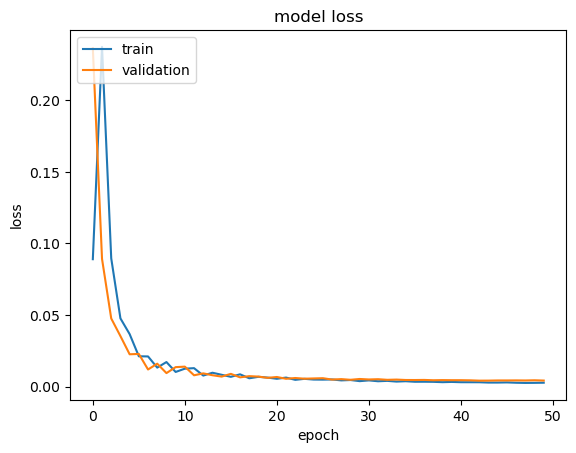

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

8/8 [==============================] - 0s 1ms/step


0.004431404817509811

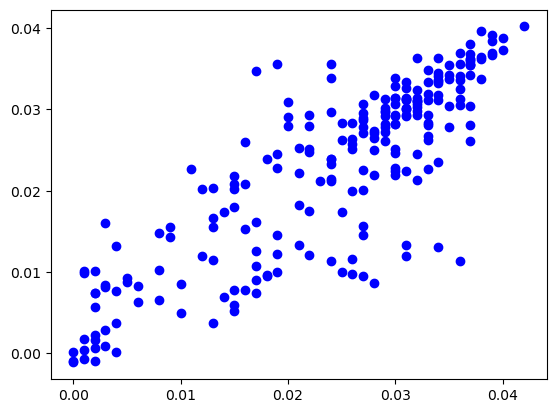

In [14]:
plt.plot(y_test, y_test_pred, 'bo')

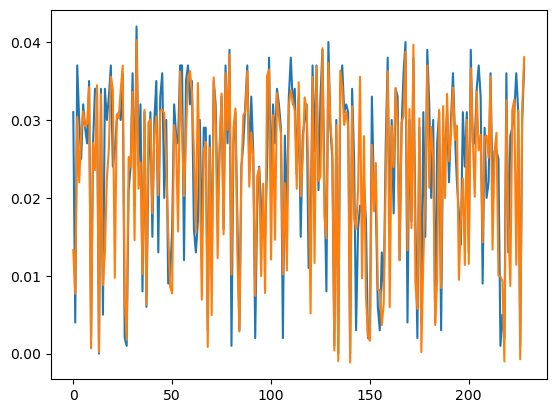

In [15]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

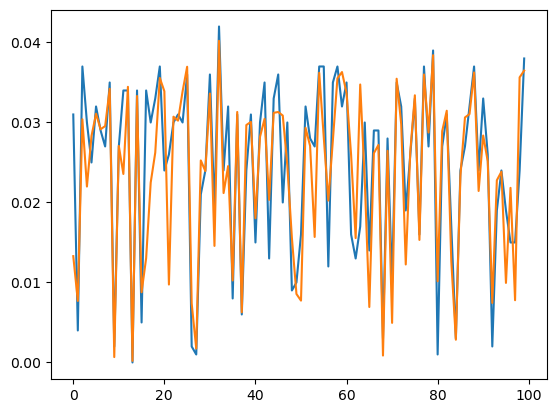

In [16]:
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.show()

### Regularization with drop-outs

In [17]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Dropout")
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               111616    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               6579

In [18]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [19]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 0s 310ms/step - loss: 0.0993 - mae: 0.0993 - mse: 0.0139 - val_loss: 0.3035 - val_mae: 0.3035 - val_mse: 0.0937
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.3453 - mae: 0.3453 - mse: 0.1272 - val_loss: 0.1043 - val_mae: 0.1043 - val_mse: 0.0113
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.1540 - mae: 0.1540 - mse: 0.0263 - val_loss: 0.0123 - val_mae: 0.0123 - val_mse: 2.1705e-04
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0336 - mae: 0.0336 - mse: 0.0017 - val_loss: 0.0558 - val_mae: 0.0558 - val_mse: 0.0033
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0485 - mae: 0.0485 - mse: 0.0032 - val_loss: 0.0453 - val_mae: 0.0453 - val_mse: 0.0022
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 0.0458 - mae: 0.0458 - mse: 0.0028 - val_loss: 0.0189 - val_mae: 0.0189 - val_mse: 5.1437e-04
Epoch 7/50
1/1 [=========

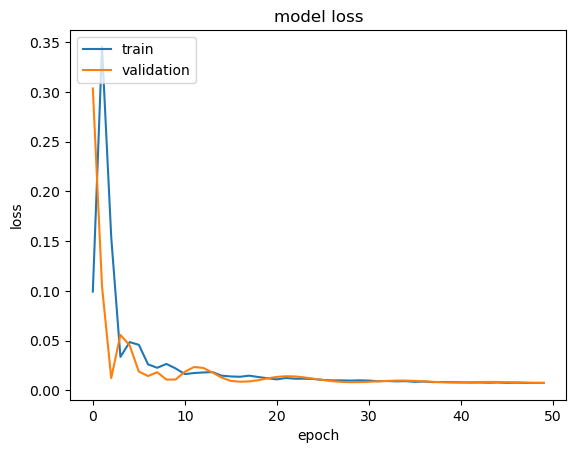

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

8/8 [==============================] - 0s 1ms/step


0.008414636094765697

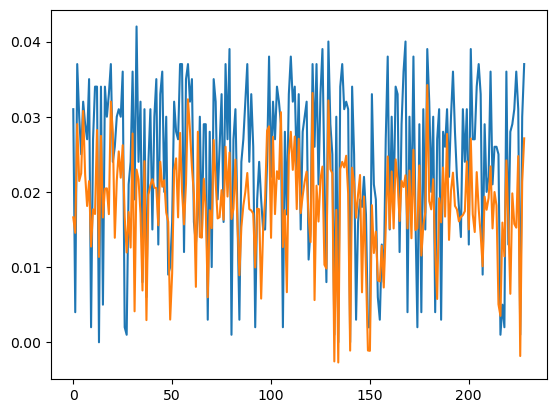

In [22]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

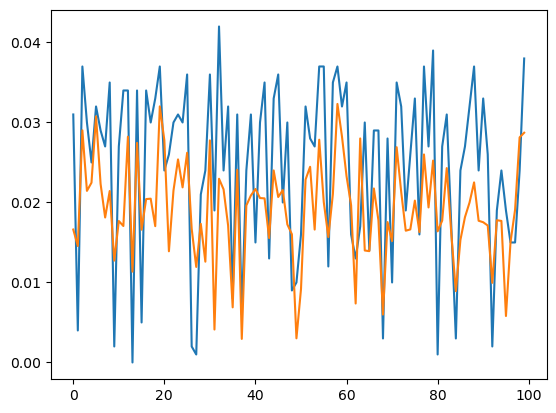

In [23]:
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.show()